In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys

sys.path.append('../')
import fico_util
import fico_solver

plt.rcParams.update({'font.size': 15, 'lines.linewidth':3.5})

## Init Vars

In [2]:
all_cdfs, performance, totals = fico_util.get_FICO_data(data_dir='../data/fico/')

scores  = all_cdfs.index.tolist()
repay_W = performance['White'].values
repay_B = performance['Black'].values
cdf_W   = all_cdfs['White'].values
cdf_B   = all_cdfs['Black'].values
util_repay      = 1
util_default    = -10

pdf_W = fico_solver.get_pdf_from_cdf(cdf_W)
pdf_B = fico_solver.get_pdf_from_cdf(cdf_B)

repay_percentage_W      = pdf_W * repay_W
repay_number_W          = repay_percentage_W * totals['White']
default_percentage_W    = pdf_W * (1 - repay_W)
default_number_W        = default_percentage_W * totals['White']
repay_percentage_B      = pdf_B * repay_B
repay_number_B          = repay_percentage_B * totals['Black']
default_percentage_B    = pdf_B * (1 - repay_B)
default_number_B        = default_percentage_B * totals['Black']

W_select_each_thresh, B_select_each_thresh, \
    W_TPR_each_thresh, B_TPR_each_thresh, \
    W_FPR_each_thresh, B_FPR_each_thresh = \
        fico_solver.compute_rate_lists(
            cdf_W, cdf_B, scores, 
            repay_number_W, default_number_W,
            repay_number_B, default_number_B
        )

In [3]:
prob_list = np.linspace(0, 0.5, 6)
# MU
thresh_W_MU_list    = np.full(len(prob_list), -np.inf)
thresh_B_MU_list    = np.full(len(prob_list), -np.inf)
selection_W_MU_list = np.full(len(prob_list), -np.inf)
selection_B_MU_list = np.full(len(prob_list), -np.inf)
util_W_MU_list      = np.full(len(prob_list), -np.inf)
util_B_MU_list      = np.full(len(prob_list), -np.inf)
selection_total_MU_list = np.full(len(prob_list), -np.inf)
util_total_MU_list  = np.full(len(prob_list), -np.inf)
# DP
thresh_W_DP_list    = np.full(len(prob_list), -np.inf)
thresh_B_DP_list    = np.full(len(prob_list), -np.inf)
selection_W_DP_list = np.full(len(prob_list), -np.inf)
selection_B_DP_list = np.full(len(prob_list), -np.inf)
util_W_DP_list      = np.full(len(prob_list), -np.inf)
util_B_DP_list      = np.full(len(prob_list), -np.inf)
selection_total_DP_list = np.full(len(prob_list), -np.inf)
util_total_DP_list  = np.full(len(prob_list), -np.inf)
# TPR
thresh_W_TP_list    = np.full(len(prob_list), -np.inf)
thresh_B_TP_list    = np.full(len(prob_list), -np.inf)
selection_W_TP_list = np.full(len(prob_list), -np.inf)
selection_B_TP_list = np.full(len(prob_list), -np.inf)
util_W_TP_list      = np.full(len(prob_list), -np.inf)
util_B_TP_list      = np.full(len(prob_list), -np.inf)
selection_total_TP_list = np.full(len(prob_list), -np.inf)
util_total_TP_list  = np.full(len(prob_list), -np.inf)
# FPR
thresh_W_FP_list    = np.full(len(prob_list), -np.inf)
thresh_B_FP_list    = np.full(len(prob_list), -np.inf)
selection_W_FP_list = np.full(len(prob_list), -np.inf)
selection_B_FP_list = np.full(len(prob_list), -np.inf)
util_W_FP_list      = np.full(len(prob_list), -np.inf)
util_B_FP_list      = np.full(len(prob_list), -np.inf)
selection_total_FP_list = np.full(len(prob_list), -np.inf)
util_total_FP_list  = np.full(len(prob_list), -np.inf)
# EO
thresh_W_EO_list    = np.full(len(prob_list), -np.inf)
thresh_B_EO_list    = np.full(len(prob_list), -np.inf)
selection_W_EO_list = np.full(len(prob_list), -np.inf)
selection_B_EO_list = np.full(len(prob_list), -np.inf)
util_W_EO_list      = np.full(len(prob_list), -np.inf)
util_B_EO_list      = np.full(len(prob_list), -np.inf)
selection_total_EO_list = np.full(len(prob_list), -np.inf)
util_total_EO_list  = np.full(len(prob_list), -np.inf)
# violation
DP_diff_list = np.full(len(prob_list), -np.inf)
TP_diff_list = np.full(len(prob_list), -np.inf)
FP_diff_list = np.full(len(prob_list), -np.inf)
EO_diff_list = np.full(len(prob_list), -np.inf)

## Run Simulation

In [4]:
for i in range(len(prob_list)):
    p = prob_list[i]
    repay_B_biased = repay_B * (1 - p)
    repay_percentage_B_biased = pdf_B * repay_B_biased
    repay_number_B_biased = repay_percentage_B_biased * totals['Black']
    default_percentage_B_biased = pdf_B * (1 - repay_B_biased)
    default_number_B_biased = default_percentage_B_biased * totals['Black']
    # compute rates
    W_select_each_thresh_biased, B_select_each_thresh_biased, \
        W_TPR_each_thresh_biased, B_TPR_each_thresh_biased, \
        W_FPR_each_thresh_biased, B_FPR_each_thresh_biased = \
            fico_solver.compute_rate_lists(
                cdf_W, cdf_B, scores, 
                repay_number_W, default_number_W, 
                repay_number_B_biased, default_number_B_biased
            )
    # find thresh
    thresh_MU_W, thresh_MU_B, thresh_MU_W_ind, thresh_MU_B_ind = \
        fico_solver.thresh_MU(
            scores, util_repay, util_default, 
            repay_number_W, default_number_W,
            repay_number_B_biased, default_number_B_biased
        )
    thresh_DP_W, thresh_DP_B, thresh_DP_W_ind, thresh_DP_B_ind = \
        fico_solver.thresh_generic(
            scores, util_repay, util_default, 
            repay_number_W, default_number_W, 
            repay_number_B_biased, default_number_B_biased, 
            W_select_each_thresh_biased, B_select_each_thresh_biased
        )
    thresh_TP_W, thresh_TP_B, thresh_TP_W_ind, thresh_TP_B_ind = \
        fico_solver.thresh_generic(
            scores, util_repay, util_default, 
            repay_number_W, default_number_W, 
            repay_number_B_biased, default_number_B_biased, 
            W_TPR_each_thresh_biased, B_TPR_each_thresh_biased
        )
    thresh_FP_W, thresh_FP_B, thresh_FP_W_ind, thresh_FP_B_ind = \
        fico_solver.thresh_generic(
            scores, util_repay, util_default, 
            repay_number_W, default_number_W, 
            repay_number_B_biased, default_number_B_biased, 
            W_FPR_each_thresh_biased, B_FPR_each_thresh_biased
        )
    thresh_EO_W, thresh_EO_B, thresh_EO_W_ind, thresh_EO_B_ind = \
        fico_solver.thresh_EO(
            scores, util_repay, util_default, 
            repay_number_W, default_number_W, 
            repay_number_B_biased, default_number_B_biased, 
            W_TPR_each_thresh_biased, B_TPR_each_thresh_biased, 
            W_FPR_each_thresh_biased, B_FPR_each_thresh_biased
        )
    # store MU
    util_W_MU, util_B_MU = fico_solver.get_util_by_thresh_ind(
            util_repay, util_default, 
            thresh_MU_W_ind, thresh_MU_B_ind, 
            repay_number_W, default_number_W, 
            repay_number_B, default_number_B
        )
    thresh_W_MU_list[i] = thresh_MU_W
    thresh_B_MU_list[i] = thresh_MU_B
    util_W_MU_list[i]   = util_W_MU
    util_B_MU_list[i]   = util_B_MU
    selection_W_MU_list[i]  = W_select_each_thresh[thresh_MU_W_ind]
    selection_B_MU_list[i]  = B_select_each_thresh[thresh_MU_B_ind]
    selection_total_MU_list[i] = (totals['White']*np.sum(pdf_W[thresh_MU_W_ind:]) + \
        totals['Black']*np.sum(pdf_B[thresh_MU_B_ind:])) / (totals['White']+totals['Black'])
    util_total_MU_list[i]   = util_W_MU + util_B_MU
    # store DP
    util_W_DP, util_B_DP = fico_solver.get_util_by_thresh_ind(
            util_repay, util_default, 
            thresh_DP_W_ind, thresh_DP_B_ind, 
            repay_number_W, default_number_W, 
            repay_number_B, default_number_B
        )
    thresh_W_DP_list[i] = thresh_DP_W
    thresh_B_DP_list[i] = thresh_DP_B
    util_W_DP_list[i]   = util_W_DP
    util_B_DP_list[i]   = util_B_DP
    selection_W_DP_list[i]  = W_select_each_thresh[thresh_DP_W_ind]
    selection_B_DP_list[i]  = B_select_each_thresh[thresh_DP_B_ind]
    selection_total_DP_list[i] = (totals['White']*np.sum(pdf_W[thresh_DP_W_ind:]) + \
        totals['Black']*np.sum(pdf_B[thresh_DP_B_ind:])) / (totals['White']+totals['Black'])
    util_total_DP_list[i]   = util_W_DP + util_B_DP
    DP_diff_list[i] = abs(W_select_each_thresh[thresh_DP_W_ind] - B_select_each_thresh[thresh_DP_B_ind])
    # store TPR
    util_W_TP, util_B_TP = fico_solver.get_util_by_thresh_ind(
            util_repay, util_default, 
            thresh_TP_W_ind, thresh_TP_B_ind, 
            repay_number_W, default_number_W, 
            repay_number_B, default_number_B
        )
    thresh_W_TP_list[i] = thresh_TP_W
    thresh_B_TP_list[i] = thresh_TP_B
    util_W_TP_list[i]   = util_W_TP
    util_B_TP_list[i]   = util_B_TP
    selection_W_TP_list[i]  = W_select_each_thresh[thresh_TP_W_ind]
    selection_B_TP_list[i]  = B_select_each_thresh[thresh_TP_B_ind]
    selection_total_TP_list[i] = (totals['White']*np.sum(pdf_W[thresh_TP_W_ind:]) + \
        totals['Black']*np.sum(pdf_B[thresh_TP_B_ind:])) / (totals['White']+totals['Black'])
    util_total_TP_list[i]   = util_W_TP + util_B_TP
    TP_diff_list[i] = abs(W_TPR_each_thresh[thresh_TP_W_ind] - B_TPR_each_thresh[thresh_TP_B_ind])
    # store FPR
    util_W_FP, util_B_FP = fico_solver.get_util_by_thresh_ind(
            util_repay, util_default, 
            thresh_FP_W_ind, thresh_FP_B_ind, 
            repay_number_W, default_number_W, 
            repay_number_B, default_number_B
        )
    thresh_W_FP_list[i] = thresh_FP_W
    thresh_B_FP_list[i] = thresh_FP_B
    util_W_FP_list[i]   = util_W_FP
    util_B_FP_list[i]   = util_B_FP
    selection_W_FP_list[i]  = W_select_each_thresh[thresh_FP_W_ind]
    selection_B_FP_list[i]  = B_select_each_thresh[thresh_FP_B_ind]
    selection_total_FP_list[i] = (totals['White']*np.sum(pdf_W[thresh_FP_W_ind:]) + \
        totals['Black']*np.sum(pdf_B[thresh_FP_B_ind:])) / (totals['White']+totals['Black'])
    util_total_FP_list[i]   = util_W_FP + util_B_FP
    FP_diff_list[i] = abs(W_FPR_each_thresh[thresh_FP_W_ind] - B_FPR_each_thresh[thresh_FP_B_ind])
    # store EO
    util_W_EO, util_B_EO = fico_solver.get_util_by_thresh_ind(
            util_repay, util_default, 
            thresh_EO_W_ind, thresh_EO_B_ind, 
            repay_number_W, default_number_W, 
            repay_number_B, default_number_B
        )
    thresh_W_EO_list[i] = thresh_EO_W
    thresh_B_EO_list[i] = thresh_EO_B
    util_W_EO_list[i]   = util_W_EO
    util_B_EO_list[i]   = util_B_EO
    selection_W_EO_list[i]  = W_select_each_thresh[thresh_EO_W_ind]
    selection_B_EO_list[i]  = B_select_each_thresh[thresh_EO_B_ind]
    selection_total_EO_list[i] = (totals['White']*np.sum(pdf_W[thresh_EO_W_ind:]) + \
        totals['Black']*np.sum(pdf_B[thresh_EO_B_ind:])) / (totals['White']+totals['Black'])
    util_total_EO_list[i]   = util_W_EO + util_B_EO
    EO_diff_list[i] = max(abs(W_TPR_each_thresh[thresh_EO_W_ind] - B_TPR_each_thresh[thresh_EO_B_ind]),\
        abs(W_FPR_each_thresh[thresh_EO_W_ind] - B_FPR_each_thresh[thresh_EO_B_ind]))

## Visualize

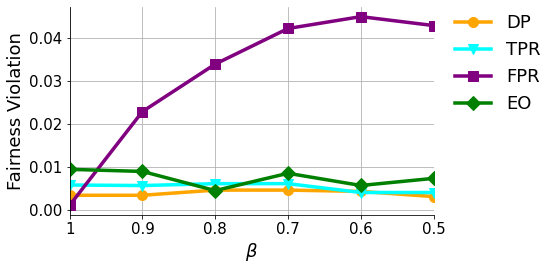

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
fs = 18
ms = 10
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(prob_list, DP_diff_list, c='orange', label='DP', marker='o', markersize=ms)
plt.plot(prob_list, TP_diff_list, c='cyan', label='TPR', marker='v', markersize=ms)
plt.plot(prob_list, FP_diff_list, c='purple', label='FPR', marker='s', markersize=ms)
plt.plot(prob_list, EO_diff_list, c='green', label='EO', marker='D', markersize=ms)
plt.xlabel(r'$\beta$', fontsize=fs)
plt.ylabel('Fairness Violation', fontsize=fs)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False, fontsize=fs)
plt.xlim(0,0.5)
plt.xticks(np.linspace(0, 0.5, 6), [1, 0.9, 0.8, 0.7, 0.6, 0.5])
plt.tight_layout()
plt.grid()

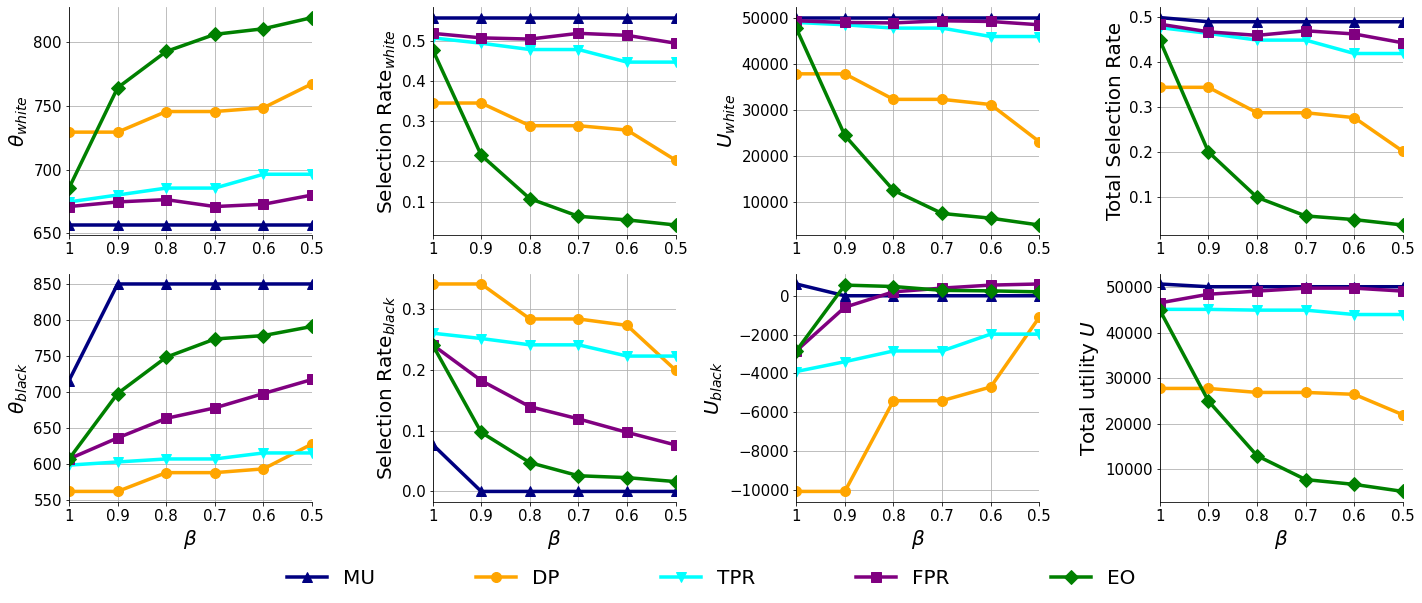

In [6]:
fig, ax = plt.subplots(2,4,figsize=(20,8))
fs = 20
ms = 10
ax[0,0].plot(prob_list, thresh_W_MU_list, c='navy', marker='^', markersize=ms)
ax[0,0].plot(prob_list, thresh_W_DP_list, c='orange', marker='o', markersize=ms)
ax[0,0].plot(prob_list, thresh_W_TP_list, c='cyan', marker='v', markersize=ms)
ax[0,0].plot(prob_list, thresh_W_FP_list, c='purple', marker='s', markersize=ms)
ax[0,0].plot(prob_list, thresh_W_EO_list, c='green', marker='D', markersize=ms)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].set_ylabel(r'$\theta_{white}$', fontsize=fs)
ax[1,0].plot(prob_list, thresh_B_MU_list, c='navy', marker='^', markersize=ms)
ax[1,0].plot(prob_list, thresh_B_DP_list, c='orange', marker='o', markersize=ms)
ax[1,0].plot(prob_list, thresh_B_TP_list, c='cyan', marker='v', markersize=ms)
ax[1,0].plot(prob_list, thresh_B_FP_list, c='purple', marker='s', markersize=ms)
ax[1,0].plot(prob_list, thresh_B_EO_list, c='green', marker='D', markersize=ms)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].set_xlabel(r'$\beta$', fontsize=fs)
ax[1,0].set_ylabel(r'$\theta_{black}$', fontsize=fs)
ax[0,0].set_xticks(np.linspace(0, 0.5, 6))
ax[0,0].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[1,0].set_xticks(np.linspace(0, 0.5, 6))
ax[1,0].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[0,0].set_xlim(0,0.5)
ax[0,0].grid()
ax[1,0].set_xlim(0,0.5)
ax[1,0].grid()

ax[0,1].plot(prob_list, selection_W_MU_list, c='navy', marker='^', markersize=ms)
ax[0,1].plot(prob_list, selection_W_DP_list, c='orange', marker='o', markersize=ms)
ax[0,1].plot(prob_list, selection_W_TP_list, c='cyan', marker='v', markersize=ms)
ax[0,1].plot(prob_list, selection_W_FP_list, c='purple', marker='s', markersize=ms)
ax[0,1].plot(prob_list, selection_W_EO_list, c='green', marker='D', markersize=ms)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].set_ylabel(r'Selection Rate$_{white}$', fontsize=fs)
ax[1,1].plot(prob_list, selection_B_MU_list, c='navy', marker='^', markersize=ms)
ax[1,1].plot(prob_list, selection_B_DP_list, c='orange', marker='o', markersize=ms)
ax[1,1].plot(prob_list, selection_B_TP_list, c='cyan', marker='v', markersize=ms)
ax[1,1].plot(prob_list, selection_B_FP_list, c='purple', marker='s', markersize=ms)
ax[1,1].plot(prob_list, selection_B_EO_list, c='green', marker='D', markersize=ms)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].set_xlabel(r'$\beta$', fontsize=fs)
ax[1,1].set_ylabel(r'Selection Rate$_{black}$', fontsize=fs)
ax[0,1].set_xticks(np.linspace(0, 0.5, 6))
ax[0,1].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[1,1].set_xticks(np.linspace(0, 0.5, 6))
ax[1,1].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[0,1].set_xlim(0,0.5)
ax[0,1].grid()
ax[1,1].set_xlim(0,0.5)
ax[1,1].grid()

ax[0,2].plot(prob_list, util_W_MU_list, c='navy', marker='^', markersize=ms)
ax[0,2].plot(prob_list, util_W_DP_list, c='orange', marker='o', markersize=ms)
ax[0,2].plot(prob_list, util_W_TP_list, c='cyan', marker='v', markersize=ms)
ax[0,2].plot(prob_list, util_W_FP_list, c='purple', marker='s', markersize=ms)
ax[0,2].plot(prob_list, util_W_EO_list, c='green', marker='D', markersize=ms)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].set_ylabel(r'$U_{white}$', fontsize=fs)
ax[1,2].plot(prob_list, util_B_MU_list, c='navy', marker='^', markersize=ms)
ax[1,2].plot(prob_list, util_B_DP_list, c='orange', marker='o', markersize=ms)
ax[1,2].plot(prob_list, util_B_TP_list, c='cyan', marker='v', markersize=ms)
ax[1,2].plot(prob_list, util_B_FP_list, c='purple', marker='s', markersize=ms)
ax[1,2].plot(prob_list, util_B_EO_list, c='green', marker='D', markersize=ms)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].set_xlabel(r'$\beta$', fontsize=fs)
ax[1,2].set_ylabel(r'$U_{black}$', fontsize=fs)
ax[0,2].set_xticks(np.linspace(0, 0.5, 6))
ax[0,2].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[1,2].set_xticks(np.linspace(0, 0.5, 6))
ax[1,2].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[0,2].set_xlim(0,0.5)
ax[0,2].grid()
ax[1,2].set_xlim(0,0.5)
ax[1,2].grid()

ax[0,3].plot(prob_list, selection_total_MU_list, c='navy', marker='^', markersize=ms)
ax[0,3].plot(prob_list, selection_total_DP_list, c='orange', marker='o', markersize=ms)
ax[0,3].plot(prob_list, selection_total_TP_list, c='cyan', marker='v', markersize=ms)
ax[0,3].plot(prob_list, selection_total_FP_list, c='purple', marker='s', markersize=ms)
ax[0,3].plot(prob_list, selection_total_EO_list, c='green', marker='D', markersize=ms)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].spines['top'].set_visible(False)
ax[0,3].set_ylabel('Total Selection Rate', fontsize=fs)
ax[1,3].plot(prob_list, util_total_MU_list, c='navy', label='MU', marker='^', markersize=ms)
ax[1,3].plot(prob_list, util_total_DP_list, c='orange', label='DP', marker='o', markersize=ms)
ax[1,3].plot(prob_list, util_total_TP_list, c='cyan', label='TPR', marker='v', markersize=ms)
ax[1,3].plot(prob_list, util_total_FP_list, c='purple', label='FPR', marker='s', markersize=ms)
ax[1,3].plot(prob_list, util_total_EO_list, c='green', label='EO', marker='D', markersize=ms)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].spines['top'].set_visible(False)
ax[1,3].set_xlabel(r'$\beta$', fontsize=fs)
ax[1,3].set_ylabel(r'Total utility $U$', fontsize=fs)
ax[0,3].set_xticks(np.linspace(0, 0.5, 6))
ax[0,3].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[1,3].set_xticks(np.linspace(0, 0.5, 6))
ax[1,3].set_xticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5])
ax[0,3].set_xlim(0,0.5)
ax[0,3].grid()
ax[1,3].set_xlim(0,0.5)
ax[1,3].grid()
plt.tight_layout()
fig.legend(bbox_to_anchor=(0.2,-0.05,0.6,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=5,frameon=False, fontsize=fs)
plt.show()